In [118]:
# for numpy arrays
import numpy

# for expit() or sigmoid function
import scipy.special

# for 2d plotting
import matplotlib.pyplot

# for plotting figures within the notebook
%matplotlib inline

In [119]:
#-----------------------------------------------------------------------------
# this 3 layer neural network is used to predict a smaller dataset of only
# 10 images of digits from 0 to 9 after training it with a dataset of 100 
# images different from the testing data

# derived directly from https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork

#-----------------------------------------------------------------------------

# SMALL DATA:
# 100 training data: https://goo.gl/2Uae7W
# 10 testing data: https://goo.gl/mtkyy8

# LARGE DATA:
# 60,000 training data: https://goo.gl/k8wLe2
# 10,000 testing data: https://goo.gl/hTvY8p

# IN this example only the smaller dataset is used;

#-----------------------------------------------------------------------------
# a simple neural network class
# is based on 3 nodes in each input, hidden(middle), and output layers
# each neuron is a node and a group of nodes is called a layer
# so there are three layers viz input, hidden, and output consisting of 3 nodes

class neuralNetwork:
    
    # initialisations
    # inputNodes - no of inputNodes
    # learningRate - is used to let the change in weights to happen moderately
    
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        
        # set the number of nodes of the neural network
        self.inputNodes = inputNodes
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        
        # set the learning rate (alpha)
        self.learningRate = learningRate
        
        # the activation function of neuron
        
        # sigmoid function given by 
        # y = 1 / (1 + e**-x)
        # used to simulate the biological neuron which collect all the input
        # signals through the dendrites and output/respond by sending its own
        # signal only after some threshold is reached
        
        self.activationFunction = lambda x: scipy.special.expit(x)
        
        # initialise weight matrices
        # weights are assigned randomly at first and then improved iteratively
        
        # random.normal gives a random number within a normal distribution 
        # with mean = 0.0 and standard deviation = 1 / sqrt(no of links)
        
        # weightInput2Hidden - a matrix, size depends on the number of nodes
        # in each layer and 
        # each member represents some weight that is associated between the two
        # neurons of two layers 
        # the larger the weight the stronger the connection and vice-versa
        
        
        # the code from book and the github link https://goo.gl/LjG2fa
        # mismatch in the second parameter of function numpy.random.normal()
        
        # in the book self.hiddenNodes is used whereas in the github self.inputNodes is used
        # in pow() function
        
        self.weightInput2Hidden = numpy.random.normal(
            0.0, pow(self.inputNodes, -0.5), (self.hiddenNodes, self.inputNodes))
        
        # in the book self.outputNodes is used whereas in the github self.hiddenNodes is used
        # in pow() function
        self.weightHidden2Output = numpy.random.normal(
            0.0, pow(self.hiddenNodes, -0.5), (self.outputNodes, self.hiddenNodes))        
        pass
    
    # train the neural network
    # inputList - list of input data
    # targetList - list of outputs for the given inputs
    # train() tries to minimize the error between targetList and the output 
    # generated by the network adjusting the weights
 
    
    def train(self, inputList, targetList):
        
        # convert inputList and outpuList into 2d arrays
        inputs = numpy.array(inputList, ndmin=2).T
        targets = numpy.array(targetList, ndmin=2).T
        
        # find hidden layer inputs
        
        # numpy.dot() simply means matrix multiplication between two matrices
        # since each input node is connected with all the hidden(inside) nodes
        # with links having some weights
        # so adding products of inputs and weights of links from each and every 
        # input nodes to a particular hidden(inside/next) node gives the
        # required input signal for the hidden(inside/next) node 
        
        # this can be easily achieved with matrix multiplication
        
        hiddenInputs = numpy.dot(self.weightInput2Hidden, inputs)
        
        # find hidden layer outputs
        # to find the output of a node we apply the sigmoid fuction to its input
        
        hiddenOutputs = self.activationFunction(hiddenInputs)
        
        # find final layer inputs
        finalInputs = numpy.dot(self.weightHidden2Output, hiddenOutputs)
        
        # find final layer outputs
        finalOutputs = self.activationFunction(finalInputs)
        
        # now we need to find the error and adjust the weight
        # between the layers to minimise the error
        # gradient descent
        
        # errors at the final layer of n/w
        # we can easily find the error at the output layer using target values
        
        outputErrors = targets - finalOutputs
        
        # now we back propogate the error adjusting the weights
        
        # to calculate the errors in the hidden layer we divide / propogate 
        # the error at an output node to the previous nodes(hidden) based 
        # on the weights of edge / link between the previous nodes 
        # and the output node
        
        # this simply can be achieved using matrix multiplication of
        # outputErrors and transpose of weights from the previous nodes to the
        # output node
        
        # errors in the hidden layer
        # .T indicates transpose
    
        hiddenErrors = numpy.dot(self.weightHidden2Output.T, outputErrors)
        
        
        # update the weights for links between hidden and output layer
        
        # this equation comes from gradient descent method of minimizing error
        # we need to minimize the square of error between actual and calculated
        # values
        # for this we observe how error in a layer changes with the change in 
        # weights of the previous layer
        # we differentiate error wrt weights and simplify using the sigmoid
        # function...
        # finalOutputs - is the output of sigmoid function/activationFunction
        
        self.weightHidden2Output += self.learningRate * numpy.dot((outputErrors * finalOutputs * (1.0 - finalOutputs)), numpy.transpose(hiddenOutputs))
        
        # update the weights for links between the input and hidden layers
        self.weightInput2Hidden += self.learningRate * numpy.dot((hiddenErrors * hiddenOutputs * (1.0 - hiddenOutputs)), numpy.transpose(inputs))

        pass

    
    # query returns the prediction of neural network when passed an input list 
    
    def query(self, inputList):
        # convert the list into a 2d array
        # .T finds the transpose of the resulting 2d matrix
        # ndmin is the min number of dimensions the matrix should have
        inputs = numpy.array(inputList, ndmin=2).T
        
        # hidden layer inputs
        hiddenInputs = numpy.dot(self.weightInput2Hidden, inputs)
        
        # calculate the signals emerging from hidden layer
        hiddenOutputs = self.activationFunction(hiddenInputs)
        
        # final layer inputs
        finalInputs = numpy.dot(self.weightHidden2Output, hiddenOutputs)
        
        # calcuate the final outputs
        finalOutputs = self.activationFunction(finalInputs)
        
        return finalOutputs

In [109]:
# first lets talk about the data
# each image data contains a single line representing the label--integer or the actual number
# in the image and the rest 784 integers contains the pixel positions for the actual digit
# in an image of size 28 by 28

# so we see that at the first layer we need to feed 784 total inputs to the neural network
# secondly the number 100 is choosen so that it is neither greater than 784 and nor lesser
# than a number which isn't able to find enough links between the neurons
# lastly the number 10 is choosen as the number of nodes for the final layer because we need
# to have 10 different outputs for ten different numbers from 0 to 9

In [121]:
# set the number of nodes
inputNodes = 784
outputNodes = 10
# hiddenNodes = 100
# a better tweak
hiddenNodes = 200

# set the learning rate
# learningRate = 0.3
# best learning rate for MNIST dataset
learningRate = 0.1

# finally let's create an instance of a neural network
n = neuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)

In [122]:
# now we will load analyse the data

# loading the MNIST training data CSV file
# ---------------------------------------------------------
# REMEMBER to download the file before running
# ---------------------------------------------------------

trainingDataFile = open('mnist_dataset/mnist_train_100.csv', 'r')
trainingDataList = trainingDataFile.readlines()
trainingDataFile.close()

actual number=  5


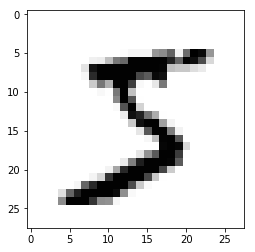

In [123]:
# checking the data
image = trainingDataList[0].split(',')
imageValues = numpy.asfarray(image[1:]).reshape(28, 28)
print('actual number= ', image[0])
matplotlib.pyplot.imshow(imageValues, cmap='Greys', interpolation='None')

In [124]:
# we need to scale the input data so that it is between 0.01 and 0.99
# i.e. within the range of output of the activation function
# so we scale the input data between 0.01 and 0.99

In [131]:
# now let's train the neural network
epochs = 7
for e in range(epochs):
    for record in trainingDataList:

        image = record.split(',')

        # scale the individual pixels between 0.01 to 1.0
        # asfarray() converts string into float
        imageValues = (numpy.asfarray(image[1:]) / 255.0 * 0.99) + 0.01

        # create the target array to store the output values
        targets = numpy.zeros(outputNodes) + 0.01
        targets[int(image[0])] = 0.99

        # train the neural network
        n.train(imageValues, targets)
        pass
    pass


In [126]:
# loading the validation file
# ---------------------------------------------------------
# REMEMBER to download the file before running
# ---------------------------------------------------------

testingDataFile = open('mnist_dataset/mnist_test_10.csv', 'r')
testingDataList = testingDataFile.readlines()
testingDataFile.close()

actual number= 7


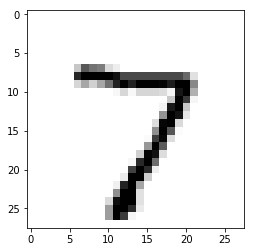

In [127]:
# testing data
image = testingDataList[0].split(',')
imageValues = numpy.asfarray(image[1:]).reshape(28, 28)
matplotlib.pyplot.imshow(imageValues, cmap='Greys', interpolation='None')
print('actual number=', image[0])

In [128]:
# check if the neural network returns 7 for the input data
n.query(((numpy.asfarray(image[1:]) / 255.0) * 0.99) + 0.01)

array([[ 0.08198146],
       [ 0.01824928],
       [ 0.05526444],
       [ 0.05751246],
       [ 0.05883327],
       [ 0.03480678],
       [ 0.00798773],
       [ 0.8017138 ],
       [ 0.06747322],
       [ 0.06020293]])

In [ ]:
# scorecard for how well the network performs
scorecard = []

for record in testingDataList:
    image = record.split(',')
    correctLabel = int(image[0])
    
    print(correctLabel, " correct number")
    
    # scale the inputs
    inputs = ((numpy.asfarray(image[1:]) / 255.0) * 0.99) + 0.01
    
    # take prediction from the network
    outputs = n.query(inputs)
    
    # take the index of the highest value corresponding to the label
    label = numpy.argmax(outputs)
    print(label, " network's answer")
    
    if (label == correctLabel):
        scorecard.append(1)
    else:
        scorecard.append(0)   
        pass
    pass

In [130]:
# calculate the performance score
score = numpy.asarray(scorecard)
print('performance = ', score.sum() / score.size)

performance =  0.6
